In [1]:
import datetime
import json
import boto3
import io
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
#import seaborn as sns
plt.style.use('ggplot')

In [2]:
pickle_file = '../btc-autotrader/lib/data/log/2019-03-09T20:40:32.117034.pickle'

In [3]:
df = pd.read_pickle(pickle_file)

In [4]:
df.tail()

,datetime,cash,cash_orig,btc_in_possession,btc_current_price,position,rate_of_change,total_value,acceleration,bid_price,ask_price,bought_price,sold_price
0,2019-03-09 20:43:28.177362,41257.0,41257.0,0.016486,432762.0,BUYING,-0.127202,0,-0.00123291,432280.0,0,0,0
0,2019-03-09 20:43:35.667696,41257.0,41257.0,0.016486,432762.0,BUYING,-0.127202,0,0,432282.0,0,0,0
0,2019-03-09 20:43:43.857680,41257.0,41257.0,0.016486,432762.0,BUYING,-0.127202,0,0,432282.0,0,0,0
0,2019-03-09 20:43:52.728640,41257.0,41257.0,0.016486,432762.0,BUYING,-0.127202,0,0,432276.0,0,0,0
0,2019-03-09 20:44:00.212347,41257.0,41257.0,0.016486,432276.0,BUYING,-0.143991,0,-0.00224335,432281.0,0,0,0


/Users/soichi/.pyenv/versions/3.7.1/envs/finance-stats/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


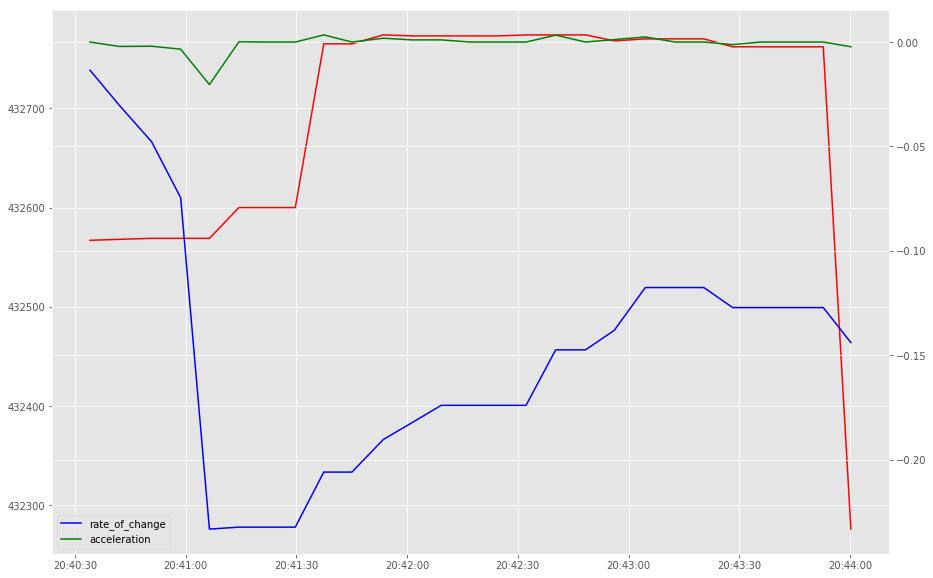

In [5]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.btc_current_price, color='r')
ax1.plot(df.datetime, df.btc_current_price.rolling(70).mean(), color='pink')
#ax1.scatter(df.datetime, df.bid_price, color='black')
ax2.plot(df.datetime, df.rate_of_change, color='b')
ax2.plot(df.datetime, df.acceleration, color='g')
ax2.legend()
plt.show()

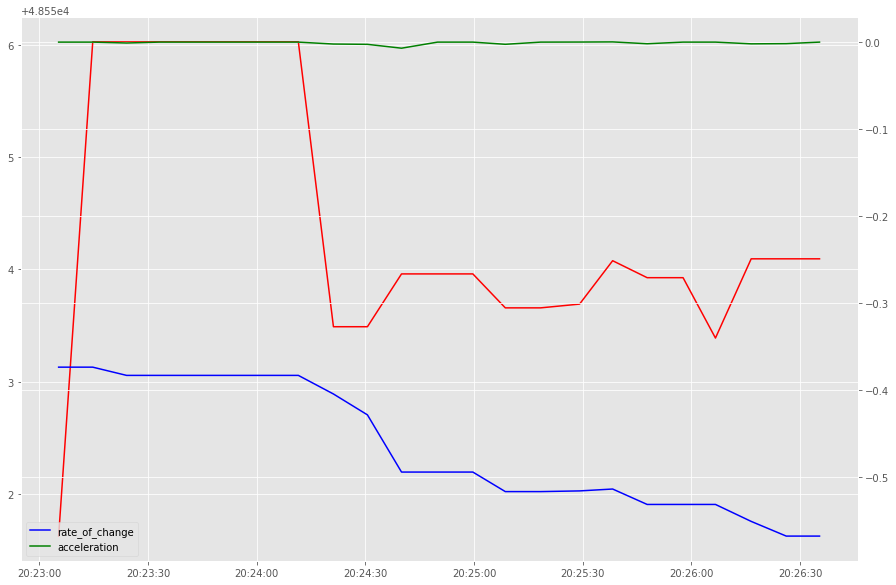

In [29]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.total_value, color='r')
ax2.plot(df.datetime, df.rate_of_change, color='b')
ax2.plot(df.datetime, df.acceleration, color='g')
ax2.legend()
plt.show()

In [30]:
df.total_value.iloc[-1] - df.total_value.iloc[0]

2.4657045000058133

No handles with labels found to put in legend.


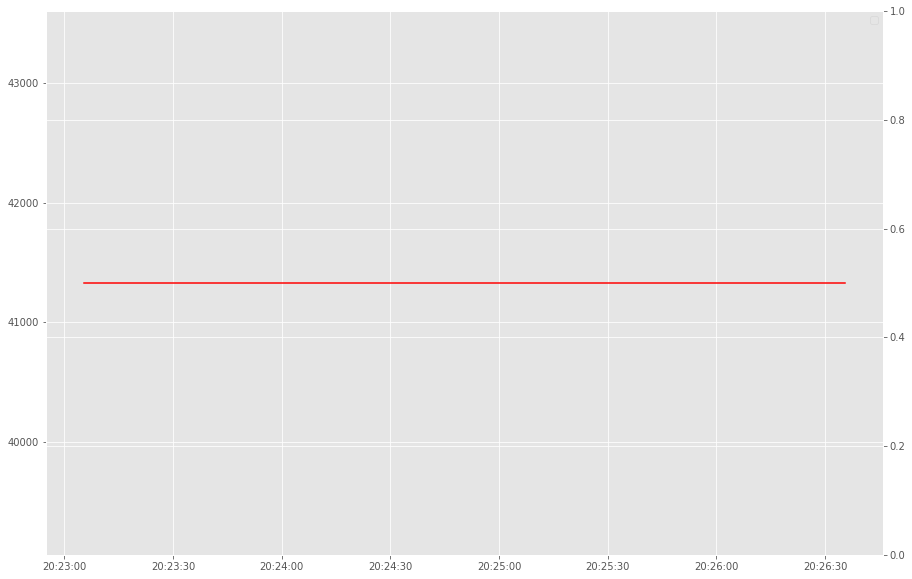

In [31]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.cash, color='r')
#ax2.plot(df.datetime, df.rate_of_change, color='b')
#ax2.plot(df.datetime, df.acceleration, color='g')
ax2.legend()
plt.show()